# PR3: Support Vector Machines for binary and multi-class classification

In PR1 and PR2 we have used Logistic Regression and k-NN for binary classification. In this practical we are going to use the Support Vector Machines (SVMs) implemented in scikit-learn for both binary and multi-class classification.

First we are going to revisit the binary classification task of text/non-text classification using the BoW features of PR2. Then we'll introduce the task of multi-class classification. 

The effectiveness of SVMs depends on the selection of the kernel function, the kernel's parameters, and the soft margin parameter C. Thus, we are going to experiment with different kernels, and with the use of grid search for parameter "optimization".

## Binary Classification

The data for the first part of the practical is the same as in PR2 (BoW features). Thus, the first thing to do is to extract the BoW features for the train and test sets and save them into a file. You have the code to this in cell number 8 of PR2 notebook. Please, generate the features using the parameters (number of words in the vocabulary and step size) which performed best in your experiments. When you have saved the features and labels in files come back here and load them.

In [1]:
import pickle
import gzip

# Load the train and test datasets

with gzip.open('../c-unsupervised_learning/BoW_train_features.pklz','rb') as f:
 (train_labels,train_features) = pickle.load(f)
    
with gzip.open('../c-unsupervised_learning/BoW_test_features.pklz','rb') as f:
 (test_labels,test_features) = pickle.load(f)

Training an SVM classifier is straightforward using scikit-learn **svm.SVC**. As other classifiers, SVC implements the **fit(...)** method (to train the classifier) and **predict(...)** method (to test on new data). The **score(...)** method returns the mean accuracy on the given test data and labels.

The **fit(...)** method take as input two arrays: an array X of size [n_samples, n_features] holding the training samples, and an array y of class labels (strings or integers), size [n_samples]. 

In [2]:
from sklearn import svm

# Train classifier (takes around 3 minutes with this kernel and data)
classifier = svm.SVC(kernel='linear')
classifier = classifier.fit(train_features, train_labels)

print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

# Run classifier
result = classifier.predict(test_features)

print "Test Accuracy : "+str(classifier.score(test_features, test_labels))

Train Accuracy : 0.884197324415
Test Accuracy : 0.783570604078


The effectiveness of SVM depends on the selection of kernel, the kernel's parameters, and soft margin parameter C. 

A Linear kernel is the simplest kernel function and has no parameters. It is given by the inner product <x,y> :

$k(x,y) = x^T y$

The best value for the soft margin parameter C is often picked with an exhaustive search strategy, for example, checking all possible values $C \in \{ 2^{-5}, 2^{-3}, \dots, 2^{13},2^{15} \}$. 

**sklearn.grid_search.GridSearchCV** perform a grid search over specified parameter values for an estimator (an **svm.SVC** classifier in out case).

It implements the **fit(...)** and **predict(...)** methods like any sklearn classifier except that the parameters of the classifier used to predict is optimized by cross-validation. Each possible combination of parameter choices is checked using cross validation, and the parameters with best cross-validation accuracy are picked. 

In [3]:
from sklearn import svm, grid_search

# Grid search for SVM parameter C
parameters = {'C':[0.1, 1, 10]} # Checking only three possible values for the C parameter
classifier = svm.SVC(kernel='linear') # Linear kernel
grid = grid_search.GridSearchCV(classifier, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

#print "Score : "+str(classifier.score(test_features, test_labels))

D:\Users\byron\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\byron\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The best parameters are {'C': 10} with a score of 0.88


## <font color='red'>Exercise 1: SVM classifier with RBF kernel and BoW features.</font>

<font color='blue'>In the previous cells you have the code to train/text an SVM classifier with a Linear kernel. Another common choice for the kernel is the Gaussian kernel (an example of radial basis function kernel), which has a single parameter $\gamma$:

$k(x, y) = \exp{(- \gamma \lVert x-y \rVert ^2 )}$

The best combination of C and $\gamma$ can be found with a grid search with exponentially growing sequences of C and $\gamma$, for example, $C \in \{ 2^{-5}, 2^{-3}, \dots, 2^{13},2^{15} \}$; $\gamma \in \{ 2^{-15},2^{-13}, \dots, 2^{1},2^{3} \}$.

Train a SVM classifier with RBF kernel and using the BoW features. 

Compare the Test Accuracy, Precision, and Recall with the obtained in PR2 with the Logistic Regression and k-NN classifiers.</font><br>

<font color='red'>**Warning**</font><font color='blue'>: If you are going to check a large number of parameter combinations **GridSearchCV** is going to take a long time to finish. By setting **verbosity** parameter to $10$ you'll be able to see intermediate results, and select the best ones even if the search has not finished: 

grid = grid_search.GridSearchCV(classifier, parameters, **verbose=10**)</font>

The following libraries are required before running the code to obtain the data for comparison. Also the previous data set with the best results is imported.


In [1]:
import pickle
import gzip
import numpy as np
from sklearn import svm, grid_search
from sklearn.metrics import confusion_matrix

# Load the best train and test datasets
with gzip.open('./c-unsupervised_learning/BoW-128-4.pklz', 'rb') as f:
    (train_labels, train_features, test_labels, test_features) = pickle.load(f)

D:\Users\byron\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\byron\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


To obtain the best C parameter for the SVM (Linear kernel).

In [2]:
n = -5.0
c_val = np.zeros(0)

while (n <= 13):
    c_val = np.append(c_val, np.power(2, n))
    n = n+2

print(c_val)

[  3.12500000e-02   1.25000000e-01   5.00000000e-01   2.00000000e+00
   8.00000000e+00   3.20000000e+01   1.28000000e+02   5.12000000e+02
   2.04800000e+03   8.19200000e+03]


In [3]:
# Grid search for SVM parameter C
# Checking only three possible values for the C parameter
parameters = {'C': c_val}
classifier = svm.SVC(kernel='linear')  # Linear kernel
grid = grid_search.GridSearchCV(classifier, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 2.0} with a score of 0.91


Using the obtained best C parameter we compute the test accuracy, precisson, and recall.

In [4]:
# Train classifier using the best C parameter
classifier = svm.SVC(kernel='linear', C=2.0)
classifier = classifier.fit(train_features, train_labels)

print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

# Run classifier
result = classifier.predict(test_features)
print "Test Accuracy : "+str(classifier.score(test_features, test_labels))

# confusion matrix on test data
cm = confusion_matrix(test_labels, result)

# Precision
precision = float(cm[1, 1]) / float((cm[1, 1] + cm[0, 1]))
print "Precision:", precision

# Recall
recall = float(cm[1, 1]) / float((cm[1, 0] + cm[1, 1]))
print "Recall:", recall

Train Accuracy : 0.91872909699
Test Accuracy : 0.898614851866
Precision: 0.887869711718
Recall: 0.912466333205


To obtain the best C parameter for the SVM (RBF kernel).

In [2]:
n = -5.0
c_val = np.zeros(0)

while (n <= 13):
    c_val = np.append(c_val, np.power(2, n))
    n = n+2

print(c_val)

[  3.12500000e-02   1.25000000e-01   5.00000000e-01   2.00000000e+00
   8.00000000e+00   3.20000000e+01   1.28000000e+02   5.12000000e+02
   2.04800000e+03   8.19200000e+03]


In [3]:
# Grid search for SVM parameter C
# Checking only three possible values for the C parameter
parameters = {'C': c_val, 'gamma': c_val}
classifier = svm.SVC(kernel='rbf')  # Linear kernel
grid = grid_search.GridSearchCV(classifier, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 8.0, 'gamma': 0.125} with a score of 0.94


Using the obtained best C and $\gamma$ parameters we compute the test accuracy, precisson, and recall.

In [4]:
# Train classifier using the best parameter
classifier = svm.SVC(kernel='rbf', C=8, gamma=0.125)
classifier = classifier.fit(train_features, train_labels)

print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

# Run classifier
result = classifier.predict(test_features)
print "Test Accuracy : "+str(classifier.score(test_features, test_labels))

# confusion matrix on test data
cm = confusion_matrix(test_labels, result)

# Precision
precision = float(cm[1, 1]) / float((cm[1, 1] + cm[0, 1]))
print "Precision:", precision

# Recall
recall = float(cm[1, 1]) / float((cm[1, 0] + cm[1, 1]))
print "Recall:", recall

Train Accuracy : 0.982775919732
Test Accuracy : 0.922181608311
Precision: 0.920966813735
Recall: 0.92362447095


<table>
    <tr>
        <th> Classifier </td>
        <th> Test Accuracy </td>
        <th> Precision </td>
        <th> Recall </td>
    </tr>
    
    <tr>
        <td> Logistic Regression </td>
        <td> 84.23 % </td>
        <td> 82.57 % </td>
        <td> 86.78 % </td>
    </tr>
    
    <tr>
        <td> k-NN (k=) </td>
        <td>  </td>
        <td>  </td>
        <td>  </td>
    </tr>
    
    <tr>
        <td> SVM (Linear kernel)</td>
        <td> 89.86 % </td>
        <td> 88.78 % </td>
        <td> 91.25 % </td>
    </tr>
    
    <tr>
        <td> SVM (RBF kernel)</td>
        <td> 92.21 % </td>
        <td> 92.10 % </td>
        <td> 92.36 % </td>
    </tr>
</table>

## Multi-class Classification

In this part of the practical we are going to deal with the problem of Multi-class classification. This means in our dataset we do not have binary labels (0=text, 1=no-text), but instead we may have any number of discrete/categorical labels. 

For this part of the practical we are going to work with a much simpler (2D) and smaller dataset: The Iris flower data set (http://en.wikipedia.org/wiki/Iris_flower_data_set) which is included by default in the scikit-learn distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline 

# import the iris dataset (http://en.wikipedia.org/wiki/Iris_flower_data_set)
iris = datasets.load_iris()
train_features = iris.data[:, :2]  # Here we only use the first two features.
train_labels = iris.target

print("We have "+str(train_features.shape[0])+" samples");
print("The possible labels are "+str(np.unique(train_labels)));

We have 150 samples
The possible labels are [0 1 2]


In [2]:
# Train a classifier
classifier = svm.SVC(kernel='linear')
classifier = classifier.fit(train_features, train_labels)

print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

Train Accuracy : 0.82


In [3]:
# This function plots the decision function of a classifier in a 2D space
# You can use it just like a black box.
# Input parameters:
#     clf : your classifier
#     X : an array of size [n_samples, n_features] holding the data samples
#     y : an array of size [n_samples] with the class labels of each sample
def plot_classifier_boundary(clf,X,y):

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

Train Accuracy : 0.82


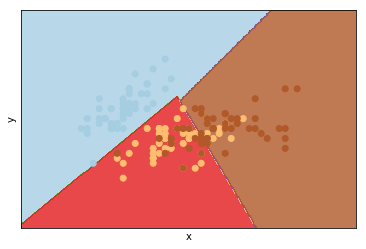

In [4]:
plot_classifier_boundary(classifier,train_features,train_labels)

print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

## <font color='red'>Exercise 2: SVM multiclass classification with different kernels.</font>

<font color='blue'>
In the previous cells you have the code to train a SVM multi-class classifier with a Linear kernel and visualize its decision boundary. 

This exercise consists in training several SVM classifiers with different kernels, compare their performance (classification accuracies), and visualize their decision boundaries.

In the scikit-learn SVM implementation, the kernel function can be any of the following:

* 'linear' : Linear kernel
* 'rbf' : Radial Basis Function kernel. It has one parameter: 'gamma'
* 'poly': Polynomial kernel. It has various parameters, but you are asked to play only with one: 'degree' (the degree of the polynomial kernel function)

You are asked to run GridSearchCV for all these three kernels and find the best values for their parameters. Show in a table the best cross-validation accuracy obtained.
</font>

The following libraries are required before running the code to obtain the data for comparison. The plot classifier boundary function is also requiered for the code to run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, grid_search
from sklearn.metrics import confusion_matrix
%matplotlib inline


def plot_classifier_boundary(clf,X,y):

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

iris = datasets.load_iris()
train_features = iris.data[:, :2]  # Here we only use the first two features.
train_labels = iris.target

D:\Users\byron\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\byron\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


For the linear kernel the following code is used.

In [2]:
n = -5.0
c_val = np.zeros(0)

while (n <= 15):
    c_val = np.append(c_val, np.power(2, n))
    n = n+2

print(c_val)

[  3.12500000e-02   1.25000000e-01   5.00000000e-01   2.00000000e+00
   8.00000000e+00   3.20000000e+01   1.28000000e+02   5.12000000e+02
   2.04800000e+03   8.19200000e+03   3.27680000e+04]


In [3]:
# Grid search for SVM parameter C
# Checking only three possible values for the C parameter
parameters = {'C': c_val}
classifier = svm.SVC(kernel='linear')  # Linear kernel
grid = grid_search.GridSearchCV(classifier, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.125} with a score of 0.81


Train Accuracy : 0.813333333333
Precision: 1.0
Recall: 1.0


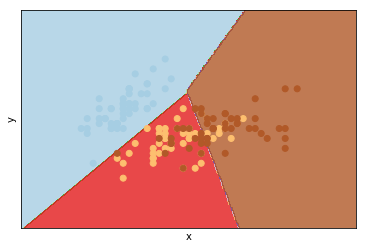

In [4]:
# Train classifier using the best parameter
classifier = svm.SVC(kernel='linear', C=0.125)
classifier = classifier.fit(train_features, train_labels)

# Run classifier
result = classifier.predict(train_features)
print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

# confusion matrix on test data
cm = confusion_matrix(train_labels, result)

# Precision
precision = float(cm[1, 1]) / float((cm[1, 1] + cm[0, 1]))
print "Precision:", precision

# Recall
recall = float(cm[1, 1]) / float((cm[1, 0] + cm[1, 1]))
print "Recall:", recall

plot_classifier_boundary(classifier, train_features, train_labels)

For the rbf kernel the following code is used.

In [5]:
# Grid search for SVM parameter C
# Checking only three possible values for the C and gamma parameters
parameters = {'C': c_val, 'gamma': c_val}
classifier = svm.SVC(kernel='rbf')  # Radial Basis Function kernel
grid = grid_search.GridSearchCV(classifier, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.03125, 'gamma': 2.0} with a score of 0.83


Train Accuracy : 0.82
Precision: 1.0
Recall: 1.0


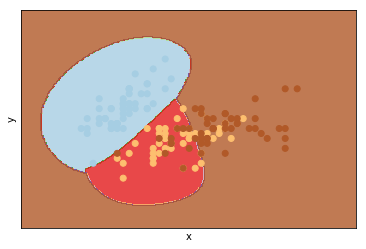

In [6]:
# Train classifier using the best parameter
classifier = svm.SVC(kernel='rbf', C=0.03125, gamma=2.0)
classifier = classifier.fit(train_features, train_labels)

# Run classifier
result = classifier.predict(train_features)
print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

# confusion matrix on test data
cm = confusion_matrix(train_labels, result)

# Precision
precision = float(cm[1, 1]) / float((cm[1, 1] + cm[0, 1]))
print "Precision:", precision

# Recall
recall = float(cm[1, 1]) / float((cm[1, 0] + cm[1, 1]))
print "Recall:", recall

plot_classifier_boundary(classifier, train_features, train_labels)

For the poly kernel the following code is used.

In [7]:
# Grid search for SVM degree parameter
# Checking only three possible values for the degree parameter
parameters = {'degree': [2, 3, 4, 8]}
classifier = svm.SVC(kernel='poly')  # Polynomial kernel
grid = grid_search.GridSearchCV(classifier, parameters)
grid.fit(train_features, train_labels)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'degree': 2} with a score of 0.81


Train Accuracy : 0.82
Precision: 1.0
Recall: 1.0


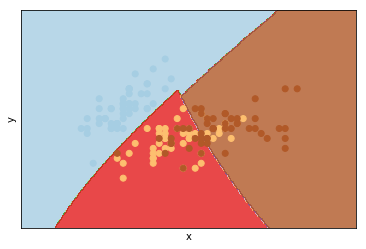

In [8]:
# Train classifier using the best parameter
classifier = svm.SVC(kernel='poly', degree=2)
classifier = classifier.fit(train_features, train_labels)

# Run classifier
result = classifier.predict(train_features)
print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

# confusion matrix on test data
cm = confusion_matrix(train_labels, result)

# Precision
precision = float(cm[1, 1]) / float((cm[1, 1] + cm[0, 1]))
print "Precision:", precision

# Recall
recall = float(cm[1, 1]) / float((cm[1, 0] + cm[1, 1]))
print "Recall:", recall

plot_classifier_boundary(classifier, train_features, train_labels)

## Custom kernels

Appart from the three default kernels in scikit learn we can create a classifier with our own custom kernel by giving the kernel as a python function. In the following list you have some kernel functions that are commonly used:

###  Chi-Square Kernels

The Chi-Square kernel comes from the Chi-Square distribution. This kernel is most commonly applied to histograms.

$k(x,y) = 1 - \sum_{i=1}^n \frac{(x_i-y_i)^2}{\frac{1}{2}(x_i+y_i)}$

Appart of the normal Chi-Square kernel, other popular definitions of Chi Squared kernels include the normalized Chi-Square kernel:

$k(x,y) = \sum_{i=1}^n \frac{(x_i*y_i)}{(x_i+y_i)}$

and the exponential Chi-Squared kernel:

$k(x,y) = \exp{(-\gamma \sum_{i=1}^n \frac{(x_i-y_i)^2}{(x_i+y_i)})}$



### Histogram Intersection Kernel

The Histogram Intersection Kernel is also known as the Min Kernel and has been proven useful in image classification.

$k(x,y) = \sum_{i=1}^n min(x_i,y_i)$



### Generalized Histogram Intersection

The Generalized Histogram Intersection kernel is built based on the Histogram Intersection Kernel for image classification but applies in a much larger variety of contexts (Boughorbel, 2005). It is given by:

$k(x,y) = \sum_{i=1}^m min(|x_i|^\alpha,|y_i|^\beta)$


The following cell of code shows how to make use of a python function as a custom kernel in **svm.SVC**. In this case it implements the Linear kernel.

In [28]:
import numpy as np
from sklearn import svm

def my_kernel(x, y): 
    return np.dot(x, y.T) #Linear kernel (dot product)

classifier = svm.SVC(kernel=my_kernel)

classifier = classifier.fit(train_features, train_labels)

print "Train Accuracy : "+str(classifier.score(train_features, train_labels))

Train Accuracy : 0.82


## <font color='red'>Exercise 3: Implement your own kernel function.</font>

Select one of the kernel functions listed above and implement it as a Python function.

Train an SVM classifier for the Iris dataset using your custom kernel function. Compare its performance with the default kernels used in the previous exercise.

Train a SVM classifier for the binary classification of text/no-text images, and compare its performance with the kernels used in exercise 1.

<font color='red'>**Warning**</font>: Training and testing the classifier with your own kernel function may be very slow if the kernel function is not vectorized. 

## <font color='red'>Exercise 4: Character recognition (optional).</font>

Using the following code you can load the raw data and the character labels (62 classes) of the ICDAR character dataset

In [29]:
#Load data
with gzip.open('./MultiClass_train_features.pklz','rb') as f:
 (ch_train_labels, ch_train_raw_pixels) = pickle.load(f)

print(ch_train_raw_pixels.shape)
print(np.unique(ch_train_labels))
    
with gzip.open('./MultiClass_test_features.pklz','rb') as f:
 (ch_test_labels, ch_test_raw_pixels) = pickle.load(f)

print(ch_test_raw_pixels.shape)
print(np.unique(ch_test_labels))

(5980, 1024)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 53 54 55 56 57 58 59 60 61 62]
(5198, 1024)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62]


Note that in the test set there is one more class (class = 52) that has only two test samples and zero training samples. This seems to be a pretty rare class, it would be wise to remove these two samples from your test data as well.

Now visualise a random image just to check that the loaded data make sense.

Label for displayed image : 29


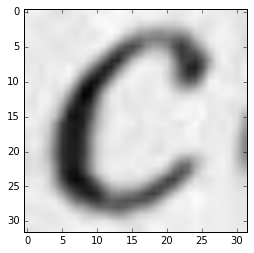

In [35]:
#Visualize a random image. Just to check that the data make sense
i=int(np.random.rand()*ch_train_raw_pixels.shape[0])

im = ch_train_raw_pixels[i,:]
im = np.reshape(im,[32,32])

plt.imshow(im, cmap=plt.cm.gray)

print "Label for displayed image : "+str(ch_train_labels[i])

Use any way you desire to extract features from the raw pixel data (histograms of intensities, bag of words, ...), and perform multi-class classification using SVMs with the configuration of your choice. What is the expected performance of a random classifier on this dataset? Are you able to do any better?